In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Creating a simple dataset with Age and Income
df = pd.DataFrame({
    'Name': ['Ace', 'John', 'Luffy', 'Joe', 'Sabo', 'Mike', 'Kiera'],
    'Age': [20, 34, 45, 23, 42, 37, 27],
    'Spending': [129, 220, 334, 170, 289, 230, 200]
})
df

,Name,Age,Spending
0,Ace,20,129
1,John,34,220
2,Luffy,45,334
3,Joe,23,170
4,Sabo,42,289
5,Mike,37,230
6,Kiera,27,200


In [2]:
# K-MEANS MODEL
# n_clusters is number of clusters, Choose number of clusters (K = 2 or 3), Create clusters (Groups)
# random_state is to controls the random initialization of centroids. Setting random_state keeps results consistent every time.
# n_init is How many times the algorithm will run K-Means with different centroid seeds, and pick the best result.
model = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Group'] = model.fit_predict(df[['Age', 'Spending']])
df

,Name,Age,Spending,Group
0,Ace,20,129,1
1,John,34,220,1
2,Luffy,45,334,0
3,Joe,23,170,1
4,Sabo,42,289,0
5,Mike,37,230,1
6,Kiera,27,200,1


| Parameter        | Meaning                | Why Used?                       |
| ---------------- | ---------------------- | ------------------------------- |
| **n_clusters**   | No. of clusters        | Decide how many groups you want |
| **random_state** | Fix randomness         | Get same result every run       |
| **n_init**       | No. of initializations | Improve cluster quality         |

#### Elbow Method (to choose the best K)
🎯 Goal:
Find the best number of clusters (K) for K-Means.

📌 Why do we need it?
K-Means requires you to decide K manually.
Elbow method helps find the most natural number of clusters.

🧠 How it Works (Simple Steps)
1. Try different K values
Example: K = 1, 2, 3, 4, 5, …
2. For each K, compute “Inertia”
Inertia = how far points are from their cluster centers
Lower inertia = better fit
But too many clusters → overfitting
3. Plot (K vs Inertia)
4. Look for the “elbow point”

The point where the curve bends/sharp drop stops
That K is the best — adding more clusters won’t improve much.

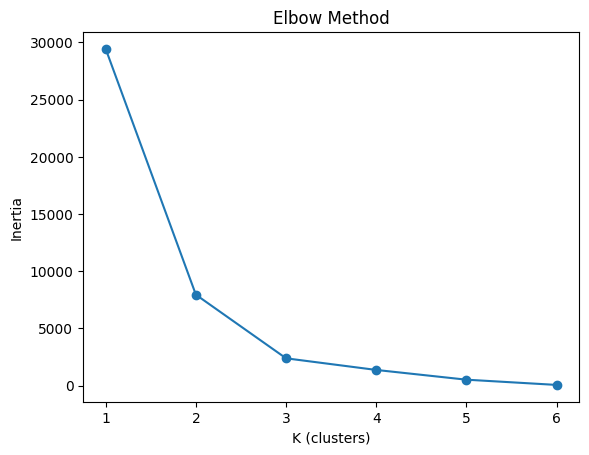

In [3]:
# Calculate best values for K
inertia_list = []
K_values = range(1, 7)   # Try K from 1 to 7

# Calculate Inertia based on different values of k
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df[['Age', 'Spending']])
    inertia_list.append(kmeans.inertia_)   # Store inertia

# Plot k values and Inertia
plt.plot(K_values, inertia_list, marker='o')
plt.xlabel("K (clusters)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
# Use value value of k where drop is biggest (In this case 2)

data     Name  Age  Spending  Group
0    Ace   20       129      1
1   John   34       220      1
3    Joe   23       170      1
5   Mike   37       230      1
6  Kiera   27       200      1
data     Name  Age  Spending  Group
2  Luffy   45       334      0
4   Sabo   42       289      0


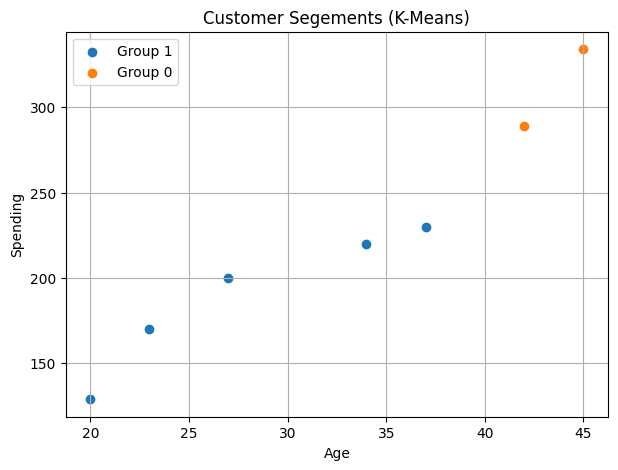

In [4]:
# This scatter plot shows the customer segments created by K-Means.
# Each color represents one cluster based on Age and Spending similarity.
# Helps visualize how K-Means grouped the customers.
plt.figure(figsize=(7, 5))

for group in df['Group'].unique():
    data = df[df['Group'] == group]
    print('data', data)
    plt.scatter(data['Age'], data['Spending'], label=f"Group {group}")

plt.xlabel('Age')
plt.ylabel('Spending')
plt.title('Customer Segements (K-Means)')
plt.legend()
plt.grid(True)
plt.show()